<a href="https://colab.research.google.com/github/vicentemf/modelos_preditivos/blob/main/estimativa_pontos_s%C3%A9rie_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#A idéia desta rotina é tentar relacionar o número de gols feitos e sofridos por um clube de futebol da Série B com os pontos obtidos ao final do campeonato .

#Esta ánalise foi feita  a partir do ano de 2006( quando o Campeonato Brasileiro passou a ter 20 Clubes e 38 rodadas) até o ano de 2020.No final comparamos com o resultado dos 5 primeiros clubes do ano de 2021. 

In [393]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")

In [355]:
data = pd.read_excel('/content/BRASILEIRO SERIE B.xlsx')

In [356]:
data.head()

,CLASSIFICAÇÃO,CLUBE,TOTAL_PONTOS,JOGOS,VITORIA,EMPATE,DERROTA,GOL_FEITO,GOL _SOFRIDO,SALDO_GOL,CAMPEAO
0,1,Atlético (MG),71,38,20,11,7,70,39,31,1
1,2,Sport (PE),64,38,18,10,10,57,36,21,2
2,3,Náutico (PE),64,38,18,9,11,64,48,16,3
3,4,América (RN),61,38,19,4,15,59,51,8,4
4,5,Paulista (SP),61,38,17,10,11,72,51,21,0


In [357]:
data.shape

(300, 11)

In [358]:
data.dtypes

CLASSIFICAÇÃO     int64
CLUBE            object
TOTAL_PONTOS      int64
JOGOS             int64
VITORIA           int64
EMPATE            int64
DERROTA           int64
GOL_FEITO         int64
GOL _SOFRIDO      int64
SALDO_GOL        object
CAMPEAO           int64
dtype: object

In [367]:
data['SALDO_GOL']=data['SALDO_GOL'].astype(int)

In [359]:
data.drop(['CAMPEAO'], axis = 1, inplace = True)

In [361]:
data.head()

,CLASSIFICAÇÃO,CLUBE,TOTAL_PONTOS,JOGOS,VITORIA,EMPATE,DERROTA,GOL_FEITO,GOL _SOFRIDO,SALDO_GOL
0,1,Atlético (MG),71,38,20,11,7,70,39,31
1,2,Sport (PE),64,38,18,10,10,57,36,21
2,3,Náutico (PE),64,38,18,9,11,64,48,16
3,4,América (RN),61,38,19,4,15,59,51,8
4,5,Paulista (SP),61,38,17,10,11,72,51,21


In [362]:
import seaborn as sns

Text(0.5, 0.98, 'Dispersão entre variáveis')

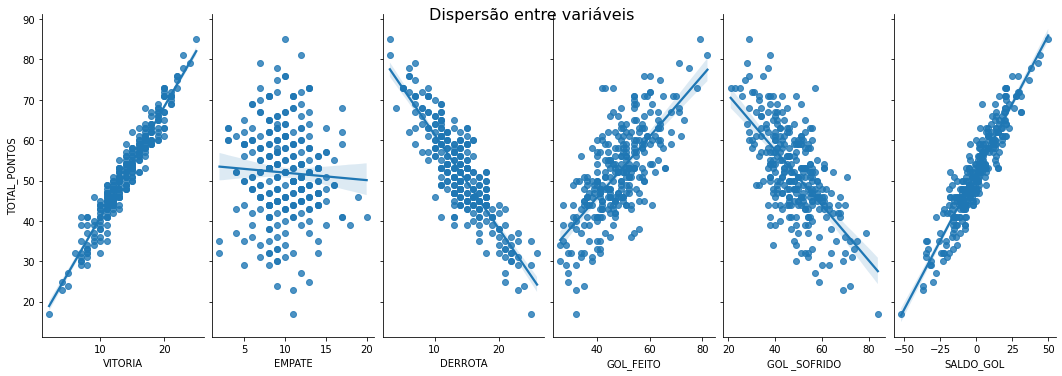

In [371]:
ax=sns.pairplot(data,y_vars=["TOTAL_PONTOS"],x_vars=["VITORIA","EMPATE","DERROTA",'GOL_FEITO','GOL _SOFRIDO','SALDO_GOL'],kind='reg')
ax.fig.set_size_inches(15,6)
ax.fig.suptitle("Dispersão entre variáveis",fontsize=16)

In [374]:
from sklearn.model_selection import train_test_split

In [375]:
y=data['TOTAL_PONTOS']
x=data[['GOL_FEITO','GOL _SOFRIDO']]

In [376]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [377]:
import statsmodels.api as sm

In [378]:
x_train_const = sm.add_constant(x_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [379]:
modelo_statsmodels = sm.OLS(y_train,x_train_const,hasconst=True).fit()

In [381]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:           TOTAL_PONTOS   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     783.9
Date:                Sun, 03 Jul 2022   Prob (F-statistic):          3.32e-105
Time:                        16:29:33   Log-Likelihood:                -680.17
No. Observations:                 240   AIC:                             1366.
Df Residuals:                     237   BIC:                             1377.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           48.3117      1.783     27.093   

In [382]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [383]:
modelo= LinearRegression()
modelo.fit(x_train,y_train)
print(f"R²={(modelo.score(x_train,y_train).round(3))}")

R²=0.869


In [384]:
y_previsto=modelo.predict(x_test)
print(f"R²={(metrics.r2_score(y_test,y_previsto).round(3))}")

R²=0.877


In [402]:
entrada=x_test
entrada[0:1]


,GOL_FEITO,GOL _SOFRIDO
244,42,30


In [404]:
math.floor(modelo.predict(entrada)[0])

59

In [430]:
gol_feito=44
gol_sofrido =35
entrada=[[gol_feito,gol_sofrido]]
print(f'Espera-se uma pontuação de {math.floor(modelo.predict(entrada))} pontos para um total de {gol_feito} gols feitos e {gol_sofrido} gols sofridos')

Espera-se uma pontuação de 57 pontos para um total de 44 gols feitos e 35 gols sofridos


In [406]:
y_previsto_train=modelo.predict(x_train)

Text(0.5, 0, 'TOTAL DE PONTOS PREVISTOS')

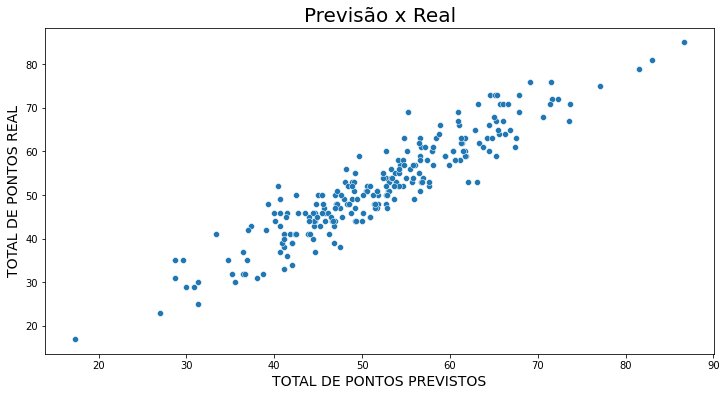

In [413]:
ax=sns.scatterplot(x=y_previsto_train,y=y_train)
ax.figure.set_size_inches(12,6)
ax.set_title("Previsão x Real",fontsize=20)
ax.set_ylabel('TOTAL DE PONTOS REAL',fontsize=14)
ax.set_xlabel('TOTAL DE PONTOS PREVISTOS',fontsize=14)

#BOTAFOGO FEZ 70 PONTOS, MODELO PREVIU 68 PONTOS
#GOIÁS FEZ 65 PONTOS,MODELO PREVIU 63 PONTOS
#CORITIBA FEZ 64 PONTOS,MODELO PREVIU 61 PONTOS 
#AVAÍ FEZ 64 PONTOS,MODELO PREVIU 57 PONTOS 
#CSA FEZ 62 PONTOS ,MODELO PREVIU 61 PONTOS